In [1]:
import cometspy_virus_test as c
import cobra
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
covid_cobra_old = cobra.io.read_sbml_model('Models/iAB_AMO1410_SARS-CoV-2.xml')
covid_cobra_new = cobra.io.read_sbml_model('Models/iAB_AMO1410_SARS-CoV-2.xml')

Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc


In [3]:
vbof = covid_cobra_new.reactions[3393]

new_coefficients = {'ala_DASH_L_c': -0.40405653355288423, 'arg_DASH_L_c': -0.2553326998866419, 'asn_DASH_L_c': -0.3658649996235405, 'asp_DASH_L_c': -0.2706103940814215, 'atp_c': -23.063351651177445, 'ctp_c': -0.040954609860685644, 'cys_DASH_L_c': -0.13700910801605434, 'gln_DASH_L_c': -0.2929221724068042, 'glu_DASH_L_c': -0.20130000403341305, 'gly_c': -0.40648021666164025, 'gtp_c': -0.040954609860685644, 'h2o_c': -22.996430209926125, 'his_DASH_L_c': -0.0758787256474576, 'ile_DASH_L_c': -0.32826780836736325, 'leu_DASH_L_c': -0.5351723866213741, 'lys_DASH_L_c': -0.2940830703034822, 'met_DASH_L_c': -0.07605185689627733, 'phe_DASH_L_c': -0.30802310754683687, 'pro_DASH_L_c': -0.27001913890266127, 'ser_DASH_L_c': -0.4616491104562987, 'thr_DASH_L_c': -0.42457524950194836, 'trp_DASH_L_c': -0.06972920866419034, 'tyr_DASH_L_c': -0.22709910729043886, 'utp_c': -0.06689789910647442, 'val_DASH_L_c': -0.37878770746009893, 'adp_c': 22.996430209926125, 'h_c': 22.996430209926125, 'pi_c': 22.996430209926125, 'ppi_c': 0.2156977623224659}
old_coefficients = {'ala_DASH_L_c': -0.523475047557154, 'arg_DASH_L_c': -0.330795596116271, 'asn_DASH_L_c': -0.473995655989129, 'asp_DASH_L_c' : -0.350589221829951, 'atp_c' : -29.8797022664371, 'ctp_c' : -0.0530586921574203, 'cys_DASH_L_c' : -0.177502469307259, 'gln_DASH_L_c' : -0.379494644083214, 'glu_DASH_L_c' : -0.2607936351114, 'gly_c' : -0.52661511282618, 'gtp_c' : -0.0530586921574203, 'h2o_c' : -29.793032726839, 'his_DASH_L_c' : -0.0983046028716697, 'ile_DASH_L_c' : -0.425287262589838, 'leu_DASH_L_c' : -0.69334229863586, 'lys_DASH_L_c' : -0.380999258691289, 'met_DASH_L_c' : -0.0985288932480286, 'phe_DASH_L_c' : -0.39905930670436, 'pro_DASH_L_c' : -0.349822896377391, 'ser_DASH_L_c' : -0.598088979425907, 'thr_DASH_L_c' : -0.550058129871867, 'trp_DASH_L_c' : -0.0903376217947519, 'tyr_DASH_L_c' : -0.294217573905061, 'utp_c' : -0.0866695395980478, 'val_DASH_L_c' : -0.490737998041092, 'adp_c' : 29.793032726839, 'h_c' : 29.793032726839, 'pi_c' : 29.793032726839, 'ppi_c' : 0.279447118078588}

for m in vbof.metabolites:
    vbof.add_metabolites({m: new_coefficients[str(m)] - old_coefficients[str(m)]})
    
sphmyln = covid_cobra_new.metabolites[1535]
pchol = covid_cobra_new.metabolites[1528]

vbof.add_metabolites({sphmyln: -0.20233837286384723, pchol: -0.20233837286384723})

In [4]:
solution_old = cobra.flux_analysis.pfba(covid_cobra_old)
solution_new = cobra.flux_analysis.pfba(covid_cobra_new)

In [5]:
print("Old Solution:", solution_old.fluxes['VBOF'])
print("New Solution:", solution_new.fluxes['VBOF'])

Old Solution: 0.014424251377327857
New Solution: 0.018687319873350577


In [6]:
labelFile = open('ReactionLabels/ReactionLabels.txt', 'r')
labels = []
for i in range(3394):
    labels.append(' '.join(labelFile.readline().strip().split()[1:]))
    
broadFile = open('ReactionLabels/BroadLabels.txt', 'r') 
labelTypes = sorted(list(set(labels)))
labelDictionary = {}

for i in range(len(labelTypes)):
    labelDictionary[labelTypes[i]] = broadFile.readline().strip()

In [7]:
nonzeroOld = []
for i in range(len(solution_old.fluxes.index)):
    flux = solution_old.fluxes[i]
    name = solution_old.fluxes.index[i]
    label = labelDictionary[labels[i]]
        
    nonzeroOld.append([label, name, flux])
        
nonzeroOld.sort()

#--------------------------------#

nonzeroNew = []
for i in range(len(solution_new.fluxes.index)):
    flux = solution_new.fluxes[i]
    name = solution_new.fluxes.index[i]
    label = labelDictionary[labels[i]]
        
    nonzeroNew.append([label, name, flux])
        
nonzeroNew.sort()

### Creating a Bar Graph of Flux DIfferences

In [8]:
colorDict = {'Transport': 'blue', 'Carbohydrates': 'orange', 'Lipids': 'green', 'Amino Acids': 'red',
             'Nucleic Acids': 'purple', 'Other': 'brown', 'Energy': 'magenta', 'Vitamins and cofactors': 'gray'}

In [9]:
handles = []
sns.set_palette("bright")
for c in colorDict:
    handles.append(mpatches.Patch(color= colorDict[c], label= c))

In [10]:
diffs = []

for i in range(len(nonzeroOld)):
    
    oldRxn = nonzeroOld[i]
    newRxn = nonzeroNew[i]
    
    if (newRxn[2] == oldRxn[2]): continue
    
    color = colorDict[oldRxn[0]]
    rxn = oldRxn[1]
    
    if (newRxn[2] < 0):
        newRxn[2] = -newRxn[2]
        oldRxn[2] = -oldRxn[2]
    
    rev = False
    
    if ((newRxn[2] >= 0) != (oldRxn[2] >= 0) and newRxn[2] != 0 and oldRxn[2] != 0): 
        rev = True

    d = newRxn[2] - oldRxn[2]
    
    #diffs.append([d, color, rxn, rev])
    diffs.append([color, d, rxn, rev])

In [11]:
diffs.sort()

In [12]:
nonzeroRxn = []
nonzeroDiff = []
nonzeroColors = []

reverse = []

for i in range(len(diffs)):
    x = diffs[i]
    
    nonzeroColors.append(x[0])
    nonzeroDiff.append(x[1])
    nonzeroRxn.append(x[2])
    
    if (x[3]): 
        print(x[2])
        reverse.append(i)

MTHFD2


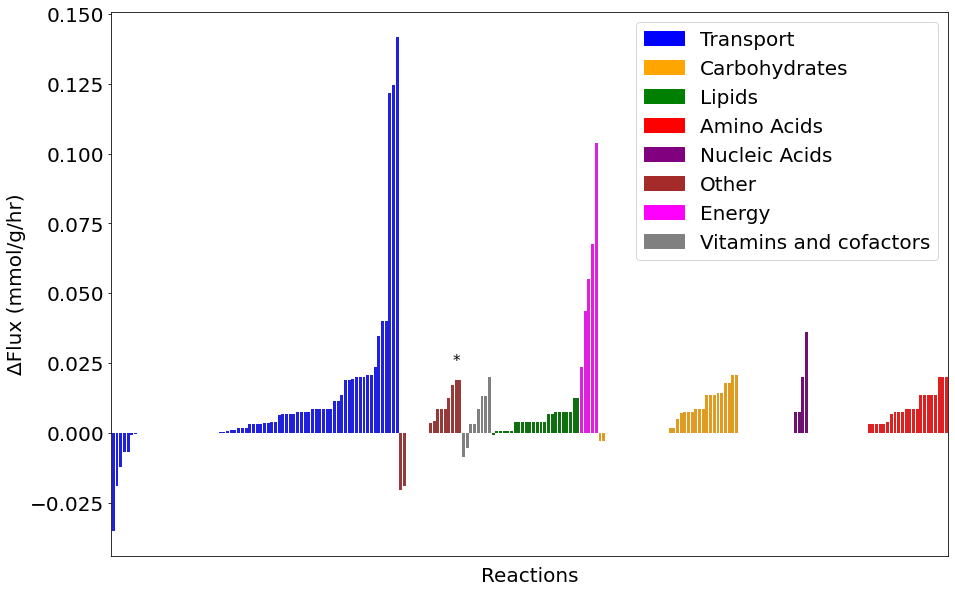

In [13]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize = (15, 10))
ax = sns.barplot(x= nonzeroRxn, y= nonzeroDiff, palette= nonzeroColors)
ax.set(xticklabels=[])
ax.set(xlabel='Reactions')
ax.set(ylabel='\u0394Flux (mmol/g/hr)')
ax.tick_params(bottom=False)

for x in reverse:
    ax.text(x, .35, '*', fontsize=15, transform=ax.get_xaxis_transform())

plt.legend(handles = handles, bbox_to_anchor=(1, 1))
fig.show()

### Creating Pie Charts

In [14]:
totalOldFlux = 0
oldTypeFluxes = {'Transport': 0, 'Carbohydrates': 0, 'Lipids': 0, 'Amino Acids': 0, 
               'Nucleic Acids': 0, 'Other': 0, 'Energy': 0, 'Vitamins and cofactors': 0}

totalNewFlux = 0
newTypeFluxes = {'Transport': 0, 'Carbohydrates': 0, 'Lipids': 0, 'Amino Acids': 0, 
               'Nucleic Acids': 0, 'Other': 0, 'Energy': 0, 'Vitamins and cofactors': 0}

totalDiffs = 0
typeDiffs = {'Transport': 0, 'Carbohydrates': 0, 'Lipids': 0, 'Amino Acids': 0, 
               'Nucleic Acids': 0, 'Other': 0, 'Energy': 0, 'Vitamins and cofactors': 0}
fluxDiffs = {'Transport': 0, 'Carbohydrates': 0, 'Lipids': 0, 'Amino Acids': 0, 
               'Nucleic Acids': 0, 'Other': 0, 'Energy': 0, 'Vitamins and cofactors': 0}

for i in range(len(nonzeroOld)):
    
    oldRxn = nonzeroOld[i]
    newRxn = nonzeroNew[i]
    
    totalOldFlux += abs(oldRxn[2])
    oldTypeFluxes[oldRxn[0]] += abs(oldRxn[2])
    
    totalNewFlux += abs(newRxn[2])
    newTypeFluxes[newRxn[0]] += abs(newRxn[2])
    
    if (oldRxn[2] != newRxn[2]):
        totalDiffs += 1
        typeDiffs[oldRxn[0]] += 1
        fluxDiffs[oldRxn[0]] += abs(newRxn[2] - oldRxn[2])

In [15]:
percentDiffs = {}
for t in fluxDiffs:
    percentDiffs[t] = fluxDiffs[t] / oldTypeFluxes[t]

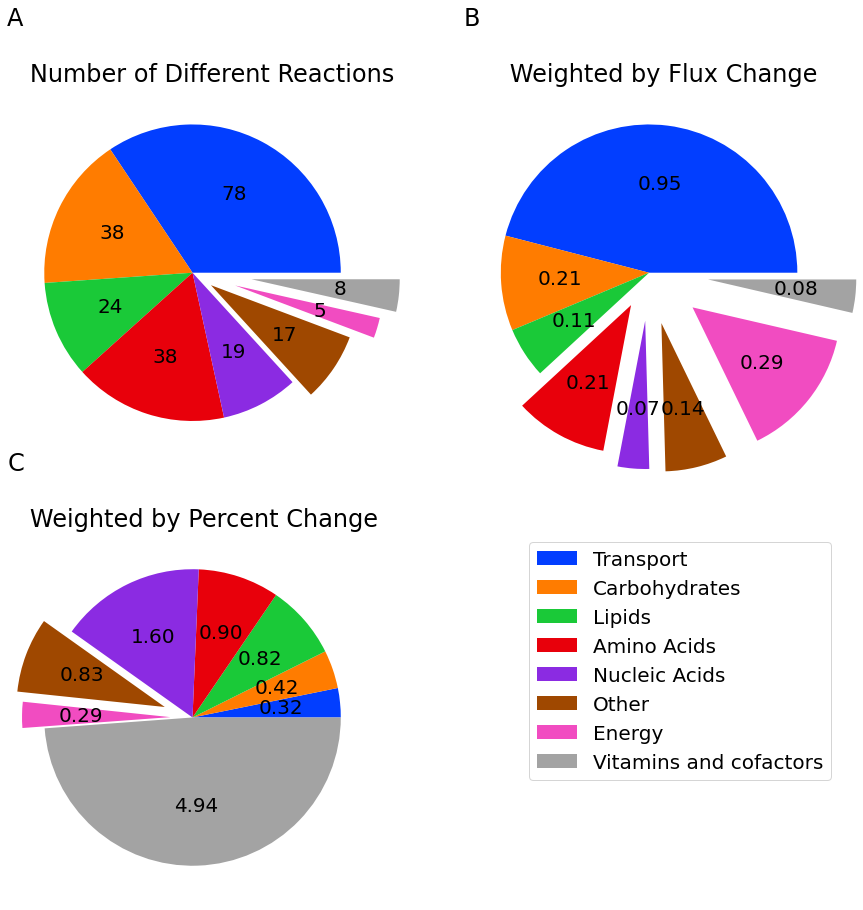

In [24]:
plt.rcParams['font.size'] = 20
fig, axs = plt.subplots(2, 2, figsize= (15, 15))
axs[0][0].pie(typeDiffs.values(), autopct=lambda x: '{:.0f}'.format(x * sum(typeDiffs.values()) / 100),
              explode= (0, 0, 0, 0, 0, 0.15, 0.3, 0.4))
axs[0][0].set_title('A\n\n   Number of Different Reactions', loc= 'left')

axs[0][1].pie(fluxDiffs.values(), autopct=lambda x: '{:.2f}'.format(x * sum(fluxDiffs.values()) / 100),
              explode=(0, 0, 0, 0.25, 0.325, 0.35, 0.375, 0.4))
axs[0][1].set_title('B\n\n      Weighted by Flux Change', loc= 'left')

axs[1][0].pie(percentDiffs.values(), autopct=lambda x: '{:.2f}'.format(x * sum(percentDiffs.values()) / 100),
              explode=(0, 0, 0, 0, 0, 0.2, 0.15, 0))
axs[1][0].set_title('C\n\n   Weighted by Percent Change', loc= 'left')

fig.delaxes(axs[1][1])

plt.legend(typeDiffs.keys(), bbox_to_anchor=(2.25, 1))
plt.show()